In [75]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [92]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data,strict=False)

In [93]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

412 documents
49 classes ['CourseB.Tech', 'CourseB.TechInt', 'CourseM.Tech', 'CourseMBATech', 'CourseMCA', 'CoursePGDM', 'CoursePhD', 'accreditation', 'affirmative', 'btechandmbatechadmissions', 'generalfeestructure', 'goodbye', 'greeting', 'hours', 'integratedprograms', 'noanswer', 'offensivewords', 'opentoday', 'otherprogramsadmissions', 'postgradprograms', 'streamCivil', 'streamComputer', 'streamDataScience', 'streamElectrical', 'streamElectronicsandTelecommunications', 'streamIndustrialAutomation', 'streamInformationTechnology', 'streamMechanical', 'streamMechatronics', 'streamartificialintelligence', 'thanks', 'undergradprograms', 'whyArtificialIntelligence', 'whyB.Tech', 'whyB.TechIntegrated', 'whyCS', 'whyCivil', 'whyDataScience', 'whyEXTC', 'whyElectrical', 'whyIT', 'whyIndustrialAutomation', 'whyM.Tech', 'whyMBATech', 'whyMCA', 'whyMechanical', 'whyMechatronics', 'whyPGDM', 'whyPhD']
156 unique stemmed words ['!', "'s", '.', 'a', 'about', 'accredit', 'admit', 'ai', 'al', 'alri

In [94]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [95]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [96]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 1256      
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_24 (Dense)             (None, 49)                441       
Total params: 1,841
Trainable params: 1,841
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
412/412 [==============================] - 1s 2ms/step - loss: 3.8747 - acc: 0.0218
Epoch 2/1000
412/412 [==============================] - 0s 219us/step - loss: 3.8128 - acc: 0.0413
Epoch 3/1000
412/412 [==============================] - 0s 227us/step - loss

412/412 [==============================] - 0s 230us/step - loss: 0.0116 - acc: 1.0000
Epoch 75/1000
412/412 [==============================] - 0s 206us/step - loss: 0.0111 - acc: 1.0000
Epoch 76/1000
412/412 [==============================] - 0s 214us/step - loss: 0.0106 - acc: 1.0000
Epoch 77/1000
412/412 [==============================] - 0s 213us/step - loss: 0.0102 - acc: 1.0000
Epoch 78/1000
412/412 [==============================] - 0s 201us/step - loss: 0.0098 - acc: 1.0000
Epoch 79/1000
412/412 [==============================] - 0s 213us/step - loss: 0.0094 - acc: 1.0000
Epoch 80/1000
412/412 [==============================] - 0s 215us/step - loss: 0.0091 - acc: 1.0000
Epoch 81/1000
412/412 [==============================] - 0s 216us/step - loss: 0.0087 - acc: 1.0000
Epoch 82/1000
412/412 [==============================] - 0s 208us/step - loss: 0.0084 - acc: 1.0000
Epoch 83/1000
412/412 [==============================] - 0s 206us/step - loss: 0.0081 - acc: 1.0000
Epoch 84/1000


412/412 [==============================] - 0s 247us/step - loss: 4.4573e-04 - acc: 1.0000
Epoch 155/1000
412/412 [==============================] - 0s 204us/step - loss: 4.2967e-04 - acc: 1.0000
Epoch 156/1000
412/412 [==============================] - 0s 217us/step - loss: 4.1240e-04 - acc: 1.0000
Epoch 157/1000
412/412 [==============================] - 0s 221us/step - loss: 4.0201e-04 - acc: 1.0000
Epoch 158/1000
412/412 [==============================] - 0s 220us/step - loss: 3.8357e-04 - acc: 1.0000
Epoch 159/1000
412/412 [==============================] - 0s 243us/step - loss: 3.7238e-04 - acc: 1.0000
Epoch 160/1000
412/412 [==============================] - 0s 239us/step - loss: 3.5629e-04 - acc: 1.0000
Epoch 161/1000
412/412 [==============================] - 0s 220us/step - loss: 3.4555e-04 - acc: 1.0000
Epoch 162/1000
412/412 [==============================] - 0s 217us/step - loss: 3.3381e-04 - acc: 1.0000
Epoch 163/1000
412/412 [==============================] - 0s 212us/ste

412/412 [==============================] - 0s 221us/step - loss: 3.4271e-05 - acc: 1.0000
Epoch 232/1000
412/412 [==============================] - 0s 245us/step - loss: 3.3061e-05 - acc: 1.0000
Epoch 233/1000
412/412 [==============================] - 0s 207us/step - loss: 3.2208e-05 - acc: 1.0000
Epoch 234/1000
412/412 [==============================] - 0s 217us/step - loss: 3.1150e-05 - acc: 1.0000
Epoch 235/1000
412/412 [==============================] - 0s 296us/step - loss: 3.0314e-05 - acc: 1.0000
Epoch 236/1000
412/412 [==============================] - 0s 228us/step - loss: 2.9306e-05 - acc: 1.0000
Epoch 237/1000
412/412 [==============================] - 0s 212us/step - loss: 2.8450e-05 - acc: 1.0000
Epoch 238/1000
412/412 [==============================] - 0s 219us/step - loss: 2.7293e-05 - acc: 1.0000
Epoch 239/1000
412/412 [==============================] - 0s 221us/step - loss: 2.6577e-05 - acc: 1.0000
Epoch 240/1000
412/412 [==============================] - 0s 224us/ste

412/412 [==============================] - 0s 240us/step - loss: 3.2069e-06 - acc: 1.0000
Epoch 310/1000
412/412 [==============================] - 0s 247us/step - loss: 3.1014e-06 - acc: 1.0000
Epoch 311/1000
412/412 [==============================] - 0s 219us/step - loss: 3.0137e-06 - acc: 1.0000
Epoch 312/1000
412/412 [==============================] - 0s 245us/step - loss: 2.9414e-06 - acc: 1.0000
Epoch 313/1000
412/412 [==============================] - 0s 255us/step - loss: 2.8427e-06 - acc: 1.0000
Epoch 314/1000
412/412 [==============================] - 0s 296us/step - loss: 2.7626e-06 - acc: 1.0000
Epoch 315/1000
412/412 [==============================] - 0s 217us/step - loss: 2.6830e-06 - acc: 1.0000
Epoch 316/1000
412/412 [==============================] - 0s 255us/step - loss: 2.6036e-06 - acc: 1.0000
Epoch 317/1000
412/412 [==============================] - 0s 226us/step - loss: 2.5262e-06 - acc: 1.0000
Epoch 318/1000
412/412 [==============================] - 0s 244us/ste

412/412 [==============================] - 0s 230us/step - loss: 3.6877e-07 - acc: 1.0000
Epoch 388/1000
412/412 [==============================] - 0s 215us/step - loss: 3.5647e-07 - acc: 1.0000
Epoch 389/1000
412/412 [==============================] - 0s 224us/step - loss: 3.4895e-07 - acc: 1.0000
Epoch 390/1000
412/412 [==============================] - 0s 214us/step - loss: 3.3868e-07 - acc: 1.0000
Epoch 391/1000
412/412 [==============================] - 0s 224us/step - loss: 3.3130e-07 - acc: 1.0000
Epoch 392/1000
412/412 [==============================] - 0s 221us/step - loss: 3.2334e-07 - acc: 1.0000
Epoch 393/1000
412/412 [==============================] - 0s 211us/step - loss: 3.1871e-07 - acc: 1.0000
Epoch 394/1000
412/412 [==============================] - 0s 211us/step - loss: 3.0873e-07 - acc: 1.0000
Epoch 395/1000
412/412 [==============================] - 0s 203us/step - loss: 3.0511e-07 - acc: 1.0000
Epoch 396/1000
412/412 [==============================] - 0s 242us/ste

412/412 [==============================] - 0s 233us/step - loss: 1.2890e-07 - acc: 1.0000
Epoch 466/1000
412/412 [==============================] - 0s 233us/step - loss: 1.2847e-07 - acc: 1.0000
Epoch 467/1000
412/412 [==============================] - 0s 223us/step - loss: 1.2861e-07 - acc: 1.0000
Epoch 468/1000
412/412 [==============================] - 0s 235us/step - loss: 1.2774e-07 - acc: 1.0000
Epoch 469/1000
412/412 [==============================] - 0s 208us/step - loss: 1.2774e-07 - acc: 1.0000
Epoch 470/1000
412/412 [==============================] - 0s 227us/step - loss: 1.2731e-07 - acc: 1.0000
Epoch 471/1000
412/412 [==============================] - 0s 210us/step - loss: 1.2644e-07 - acc: 1.0000
Epoch 472/1000
412/412 [==============================] - 0s 218us/step - loss: 1.2586e-07 - acc: 1.0000
Epoch 473/1000
412/412 [==============================] - 0s 208us/step - loss: 1.2572e-07 - acc: 1.0000
Epoch 474/1000
412/412 [==============================] - 0s 216us/ste

412/412 [==============================] - 0s 245us/step - loss: 1.1979e-07 - acc: 1.0000
Epoch 544/1000
412/412 [==============================] - 0s 238us/step - loss: 1.1964e-07 - acc: 1.0000
Epoch 545/1000
412/412 [==============================] - 0s 276us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 546/1000
412/412 [==============================] - 0s 233us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 547/1000
412/412 [==============================] - 0s 237us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 548/1000
412/412 [==============================] - 0s 250us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 549/1000
412/412 [==============================] - 0s 243us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 550/1000
412/412 [==============================] - 0s 244us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 551/1000
412/412 [==============================] - 0s 254us/step - loss: 1.1950e-07 - acc: 1.0000
Epoch 552/1000
412/412 [==============================] - 0s 234us/ste

412/412 [==============================] - 0s 226us/step - loss: 1.2384e-07 - acc: 1.0000
Epoch 621/1000
412/412 [==============================] - 0s 203us/step - loss: 1.2369e-07 - acc: 1.0000
Epoch 622/1000
412/412 [==============================] - 0s 204us/step - loss: 1.2355e-07 - acc: 1.0000
Epoch 623/1000
412/412 [==============================] - 0s 202us/step - loss: 1.2369e-07 - acc: 1.0000
Epoch 624/1000
412/412 [==============================] - 0s 207us/step - loss: 1.2326e-07 - acc: 1.0000
Epoch 625/1000
412/412 [==============================] - 0s 201us/step - loss: 1.2326e-07 - acc: 1.0000
Epoch 626/1000
412/412 [==============================] - 0s 194us/step - loss: 1.2297e-07 - acc: 1.0000
Epoch 627/1000
412/412 [==============================] - 0s 219us/step - loss: 1.2297e-07 - acc: 1.0000
Epoch 628/1000
412/412 [==============================] - 0s 234us/step - loss: 1.2254e-07 - acc: 1.0000
Epoch 629/1000
412/412 [==============================] - 0s 209us/ste

412/412 [==============================] - 0s 277us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 698/1000
412/412 [==============================] - 0s 250us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 699/1000
412/412 [==============================] - 0s 207us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 700/1000
412/412 [==============================] - 0s 229us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 701/1000
412/412 [==============================] - 0s 284us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 702/1000
412/412 [==============================] - 0s 243us/step - loss: 1.1935e-07 - acc: 1.0000
Epoch 703/1000
412/412 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 704/1000
412/412 [==============================] - 0s 291us/step - loss: 1.1921e-07 - acc: 1.0000 0s - loss: 1.1921e-07 - acc: 1.00
Epoch 705/1000
412/412 [==============================] - 0s 242us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 706/1000
412/412 [============

412/412 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 775/1000
412/412 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 776/1000
412/412 [==============================] - 0s 218us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 777/1000
412/412 [==============================] - 0s 213us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 778/1000
412/412 [==============================] - 0s 210us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 779/1000
412/412 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 780/1000
412/412 [==============================] - 0s 224us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 781/1000
412/412 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 782/1000
412/412 [==============================] - 0s 199us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 783/1000
412/412 [==============================] - 0s 199us/ste

412/412 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 853/1000
412/412 [==============================] - 0s 209us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 854/1000
412/412 [==============================] - 0s 204us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 855/1000
412/412 [==============================] - 0s 203us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 856/1000
412/412 [==============================] - 0s 213us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 857/1000
412/412 [==============================] - 0s 204us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 858/1000
412/412 [==============================] - 0s 186us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 859/1000
412/412 [==============================] - 0s 216us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 860/1000
412/412 [==============================] - 0s 217us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 861/1000
412/412 [==============================] - 0s 226us/ste

412/412 [==============================] - 0s 221us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 931/1000
412/412 [==============================] - 0s 209us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 932/1000
412/412 [==============================] - 0s 207us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 933/1000
412/412 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 934/1000
412/412 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 935/1000
412/412 [==============================] - 0s 213us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 936/1000
412/412 [==============================] - 0s 217us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 937/1000
412/412 [==============================] - 0s 204us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 938/1000
412/412 [==============================] - 0s 206us/step - loss: 1.1921e-07 - acc: 1.0000
Epoch 939/1000
412/412 [==============================] - 0s 213us/ste

In [97]:
model.save('model_ChatBot.h5')

In [98]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

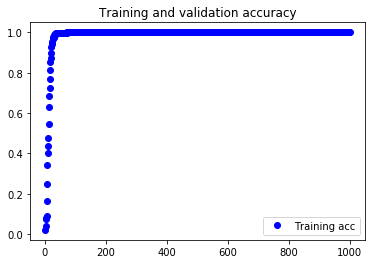

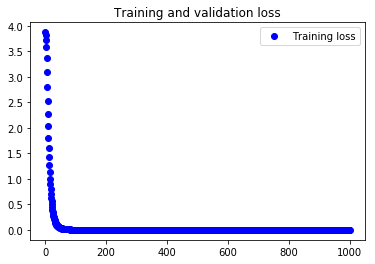

In [99]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [100]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [101]:
p = bow("I would like to buy flowers", words)
print (p)
print (classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
['CourseB.Tech', 'CourseB.TechInt', 'CourseM.Tech', 'CourseMBATech', 'CourseMCA', 'CoursePGDM', 'CoursePhD', 'accreditation', 'affirmative', 'btechandmbatechadmissions', 'generalfeestructure', 'goodbye', 'greeting', 'hours', 'integratedprograms', 'noanswer', 'offensivewords', 'opentoday', 'otherprogramsadmissions', 'postgradprograms', 'streamCivil', 'streamComputer', 'streamDataScience', 'streamElectrical', 'streamElectronicsandTelecommunications', 'streamIndustrialAutomation', 'streamInformationTechnology', 'streamMechanical', 'streamMechatronics', 'streamartificialintelligence', 'thanks', 'undergradprograms', 'whyArtificialIntelligence', 'whyB.Tech', 'whyB.TechIntegrated'

In [102]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [103]:
tot = np.vstack((p,a))

In [104]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

64